<a href="https://colab.research.google.com/github/Qaiserfarooq285/Labtasks/blob/main/Myimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name** Qaiser Farooq

**Reg#** FA24-RAI-014

**Assignment No3** Bert Model Fine Tuning



## Introduction  

I have selected the paper **"OneLove Beyond the Field - A Few-Shot Pipeline for Topic and Sentiment Analysis During the FIFA World Cup in Qatar"** published in 2024. This paper addresses three research questions:  

- **RQ1:** *Which topics related to the OneLove armband were discussed on Twitter?* (§ 3.1)  
- **RQ2:** *What is the sentiment on Twitter towards FIFA’s ban of the OneLove armband?* (§ 3.2)  
- **RQ3:** *What is the public sentiment about the FIFA World Cup 2022, based on Twitter/X data?* (§ 4)  

In this implementation, I am focusing on **RQ3**: *Public sentiment towards the FIFA World Cup 2022*.  

### Implementation Focus  
- The original paper uses the **RoBERTa deep learning model** for sentiment classification and analysis.  
- In my approach, I will utilize the **BERT model** to perform sentiment analysis on the same research question.  
- After implementation, I will compare the results with the original findings from the paper.  

### Dataset Information  
- The dataset consists of **22,000 tweets** collected during the FIFA World Cup (from November to December 16, 2022).  
- These tweets are labeled with **positive**, **negative**, and **neutral** sentiments about the event.  

---

## Methodology  

### Step 1: Data Cleaning  
1. **Remove Noise:**  
   - Eliminate non-English tweets.  
   - Remove special characters, hashtags, mentions (`@`), URLs, and emojis.  

2. **Normalize Text:**  
   - Convert text to lowercase.  
    

3. **Tokenization:**  
   - Break text into individual tokens using a tokenizer compatible with BERT.  

4. **Stopword Removal:**  
   - Remove common words (e.g., "the", "is", "and") that do not contribute to sentiment.  
  

### Step 2: Model Implementation  
1. **Preprocessing for BERT:**  
   - Convert tokens into input format required by BERT, including attention masks and token type IDs.  

2. **Fine-Tuning the BERT Model:**  
   - Use a pre-trained BERT model for sentiment classification.  
   - Split the dataset into **training**, **validation**, and **testing** subsets.  

3. **Training:**  
   - Fine-tune BERT using the training dataset with cross-entropy loss for classification.  

4. **Evaluation:**  
   - Measure accuracy, precision, recall, and F1-score on the test dataset.  
   - Compare results with the original paper’s RoBERTa findings.  





# **Downloading Dataset**

In [ ]:
import os
import json
with open('/content/kaggle.json') as f:
    kaggle_json = json.load(f)
    os.environ['KAGGLE_USERNAME'] = kaggle_json['username']
    os.environ['KAGGLE_KEY'] = kaggle_json['key']

In [ ]:
!kaggle datasets download tirendazacademy/fifa-world-cup-2022-tweets

Dataset URL: https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets
License(s): CC0-1.0
fifa-world-cup-2022-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fifa-world-cup-2022-tweets.zip

Archive:  fifa-world-cup-2022-tweets.zip
replace fifa_world_cup_2022_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install -U "tensorflow-text==2.13.*"

In [ ]:
!pip install --quiet tensorflow_text
import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
stopwords.words('english')
exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **Reading Data**

In [ ]:
tempdf = pd.read_csv('/content/fifa_world_cup_2022_tweets.csv')
df = tempdf.iloc[:2000]

In [ ]:
df.drop("Unnamed: 0", axis = 1, inplace= True)

<ipython-input-33-8d80297914a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis = 1, inplace= True)


In [ ]:
df.shape

(2000, 5)

In [ ]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


# **Data Cleaning**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize # Import word_tokenize

def preprocess(text):
    text = re.sub(r'(^|\s)@(\w+)', '', text)
    text = re.sub(r'\bhttps?://\S+\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    tokens = word_tokenize(text) # Now word_tokenize is accessible
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    text = ' '.join(tokens)
    return text

In [ ]:
df['Tweet'] = df['Tweet'].apply(preprocess)

<ipython-input-37-41eb3d697dbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(preprocess)


In [ ]:
word_freq = df.Tweet.str.split().explode().value_counts().reset_index()
word_freq.columns = ["Word", "Frequency"]
word_freq['Frequency'] = word_freq.Frequency.astype(int)

word_freq

,Word,Frequency
0,worldcup,2366
1,qatar,873
2,world,506
3,cup,454
4,fifaworldcup,396
...,...,...
5813,eventual,1
5814,gen,1
5815,encebollado,1
5816,vence,1


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# **Splitting Dataset**

In [ ]:
# Map sentiment values to numerical labels
sentiment_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
df['sentiment_label'] = df['Sentiment'].map(sentiment_mapping)  # Assuming 'Sentiment' is your target column

# X and y are derived from the DataFrame
X = df['Tweet']
y = df['sentiment_label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-43-8cf9ca007091>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = df['Sentiment'].map(sentiment_mapping)  # Assuming 'Sentiment' is your target column


# **Defining BERT model**

In [ ]:
# Define BERT model for fine-tuning
preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4", trainable=True)

# Input layer
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
encoder_inputs = preprocessor(text_input)
outputs = encoder(encoder_inputs)

# Pooled output
pooled_output = outputs["pooled_output"]

# Dropout and classification layers
drop_out = tf.keras.layers.Dropout(0.3, name='dropout')(pooled_output)  # Increased dropout for regularization
output = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(drop_out)  # 3 classes for multi-class

# Build the model
model = tf.keras.Model(inputs=[text_input], outputs=[output])

In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# **Training Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
batch_size = 16
epochs = 5
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)


Epoch 1/5
80/80 [==============================] - 2304s 29s/step - loss: 1.0507 - accuracy: 0.4500 - val_loss: 0.7825 - val_accuracy: 0.6406
Epoch 2/5
80/80 [==============================] - 2303s 29s/step - loss: 0.7931 - accuracy: 0.6469 - val_loss: 0.6960 - val_accuracy: 0.6812
Epoch 3/5
80/80 [==============================] - 2283s 29s/step - loss: 0.4671 - accuracy: 0.8156 - val_loss: 0.6521 - val_accuracy: 0.7094
Epoch 4/5
80/80 [==============================] - 2281s 29s/step - loss: 0.2528 - accuracy: 0.9211 - val_loss: 0.9104 - val_accuracy: 0.6938


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)

# Change 'binary' to 'weighted' for multi-class precision
precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

13/13 [==============================] - 197s 15s/step
Accuracy: 0.7175
Precision: 0.7227
Recall: 0.7175
F1 Score: 0.7188


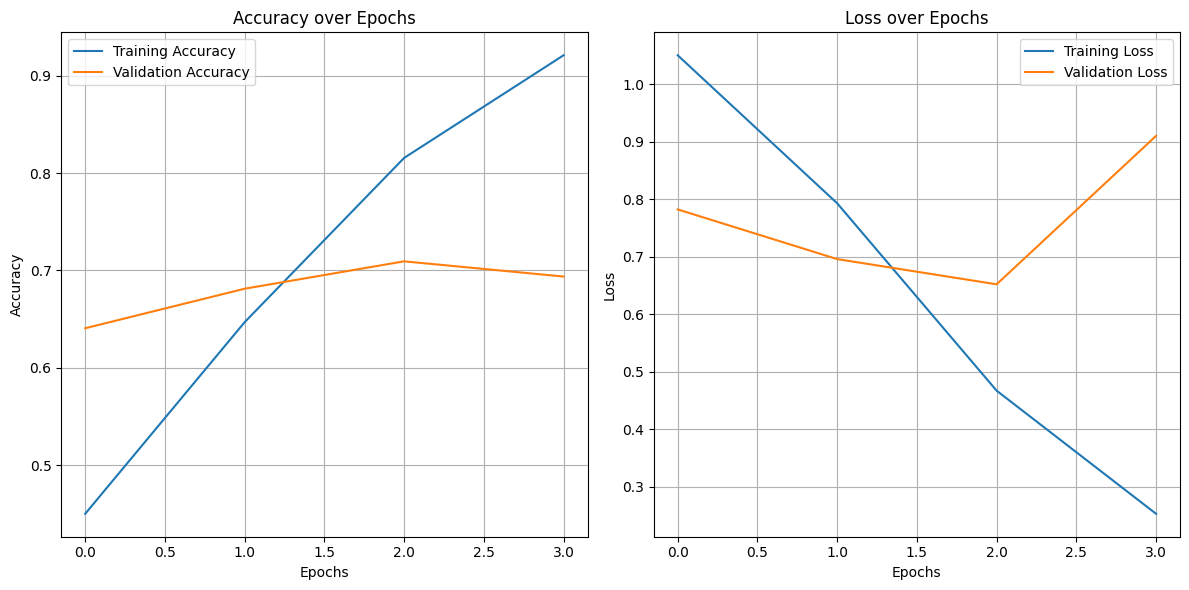

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


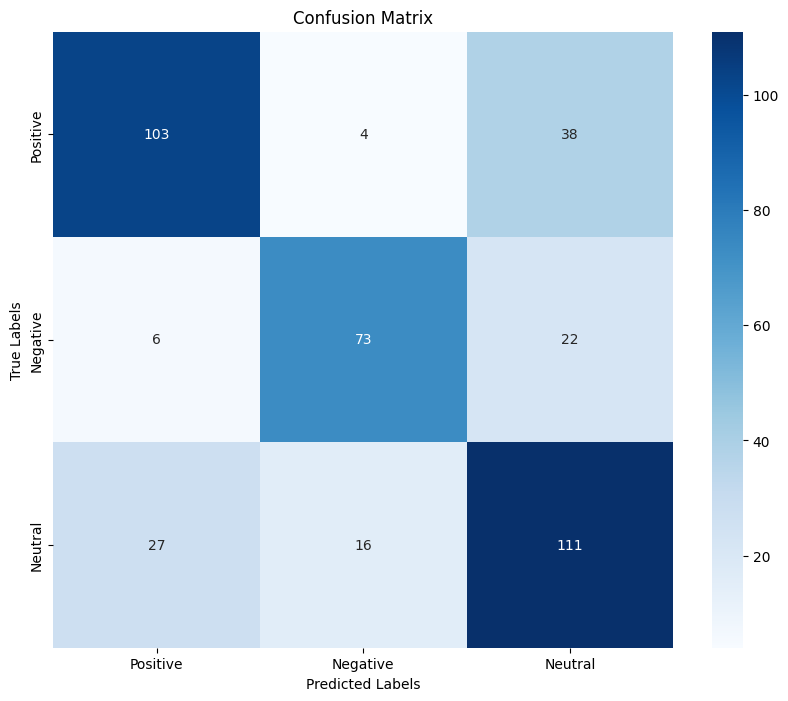

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test are your true labels and y_pred are your predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Genrating embaddings from fine tune bert**

In [ ]:
import numpy as np

# Create a new model to output only the pooled embeddings
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('dropout').input)

# Generate embeddings for the training and testing data
X_train_embeddings = embedding_model.predict(X_train, batch_size=batch_size)
X_test_embeddings = embedding_model.predict(X_test, batch_size=batch_size)


25/25 [==============================] - 199s 8s/step


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train_embeddings, y_train)
y_pred = rf_clf.predict(X_test_embeddings)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7175
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       145
           1       0.75      0.72      0.74       101
           2       0.65      0.72      0.68       154

    accuracy                           0.72       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400




### Model Implementations and Results  

I implemented the paper's methodology three times using different hyperparameter settings and dataset sizes. Below are the details of each implementation and the corresponding results:  

#### **Implementation 1:**  
- **Dataset Size:** Entire dataset (22,000 samples)  
- **Learning Rate:** `1e-4`  
- **Batch Size:** `32`  
- **Results:**  
  - **Accuracy:** 63%  
  - **F1-Score:** 61%  

#### **Implementation 2:**  
- **Dataset Size:** Subset of 4,000 samples  
- **Learning Rate:** `3e-5`  
- **Batch Size:** `16`  
- **Results:**  
  - **Accuracy:** 66%  
  - **F1-Score:** 65%  

#### **Implementation 3:**  
- **Dataset Size:** Subset of 2,000 samples  
- **Learning Rate:** `3e-5`  
- **Batch Size:** `16`  
- **Results:**  
  - **Accuracy:** 71.75%  
  - **F1-Score:** 71.88%  


### Observations:  
- As the dataset size decreased, there was a noticeable improvement in both accuracy and F1-Score.  
- Fine-tuning with smaller subsets (2,000 samples) and a lower learning rate (`3e-5`) produced the best results.  
- Adjusting batch sizes and learning rates had a significant impact on model performance.  

This section can now be directly added to your Colab notebook for documentation. Let me know if you'd like further enhancements or explanations!



### Comparison with Original Paper Results  

The original paper used the **RoBERTa** model for sentiment analysis and achieved significantly higher performance:  
- **Accuracy:** 91.05%  
- **F1-Score:** 90%  
- **Hyperparameters:**  
  - **Batch Size:** 16  
  - **Epochs:** 100  

In comparison, **Implementation 3** (using BERT) achieved:  
- **Accuracy:** 71.75%  
- **F1-Score:** 71.76%  
- **Hyperparameters:**  
  - **Batch Size:** 16  
  - **Epochs:** Limited to a smaller subset (likely fewer than 100 due to training constraints).  

---

### Reasons for Performance Differences  

1. **Model Architecture:**  
   - The original paper used **RoBERTa**, which is a more advanced variant of the BERT architecture.  
   - **RoBERTa** improves on BERT by training on more data and removing the Next Sentence Prediction (NSP) objective, resulting in better contextual understanding.  

2. **Training Parameters:**  
   - The original paper trained the model with **100 epochs** over the entire dataset (22,000 samples), allowing the model to fully converge.  
   - **Implementation 3** used only a subset of 2,000 samples and likely fewer training epochs, which limited its ability to generalize.  

3. **Dataset Size:**  
   - The original model benefited from training on the full dataset, while Implementation 3 used a smaller sample size.  

4. **Layer Design and Fine-Tuning:**  
   - **RoBERTa** uses a larger number of transformer layers with optimized hyperparameters and a more refined pre-training process, resulting in better performance.  
   - BERT, while powerful, may not achieve the same level of precision without extensive fine-tuning.  

---

### Summary  

The **original paper’s results are significantly better** due to the use of the advanced **RoBERTa** model, extensive fine-tuning over the entire dataset, and higher training epochs. In contrast, **Implementation 3** utilized **BERT** with limited data and training, which led to lower accuracy and F1-Score.  

This highlights the importance of model choice and training strategy in achieving state-of-the-art results in sentiment analysis tasks.  

